In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_orig_file = 'X_orig.npy'
X_orig = np.load(X_orig_file)

In [3]:
m, n_H0, n_W0, n_C0 = X_orig.shape

In [4]:
# Load labels

def get_labels(labels_loc, m):
    Y_df = pd.read_csv(labels_loc)
    Y_orig = np.array(Y_df.iloc[:m, 1:])
    labels = Y_df.iloc[:,1:].idxmax(axis = 1)
    labels.replace('MEL','Melanoma',inplace=True)
    labels.replace('NV','Melanocytic nevus',inplace=True)
    labels.replace('BCC','Basal cell carcinoma',inplace=True)
    labels.replace('AKIEC','Actinic keratosis',inplace=True)
    labels.replace('BKL','Benign keratosis',inplace=True)
    labels.replace('DF','Dermatofibroma',inplace=True)
    labels.replace('VASC','Vascular lesion',inplace=True)
    return Y_orig, labels
    

In [5]:
labels_loc = '../ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv'
Y_orig, labels = get_labels(labels_loc, m)
Y_df = pd.read_csv(labels_loc)

In [20]:
# Visualize images

num_images = 6
idx = np.random.choice(m, size=num_images)

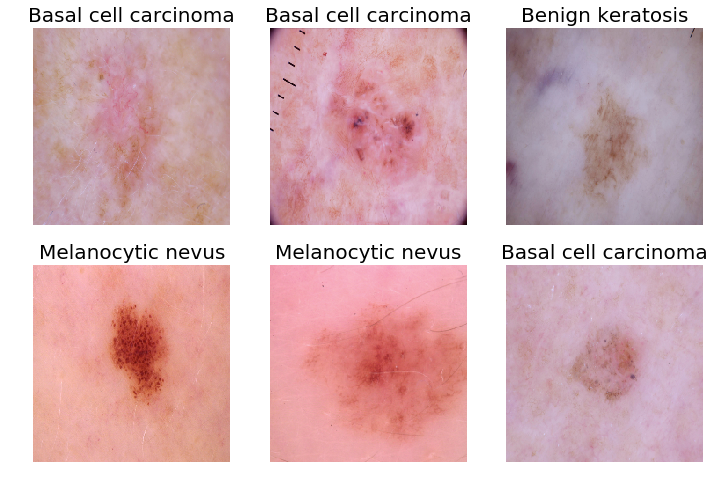

In [21]:
num_rows = 2
num_cols = 3

fig, ax = plt.subplots(nrows = num_rows, ncols = num_cols)
fig.set_size_inches(12,8)
#fig.axis('off')
for i, j in enumerate(idx):
    # Find the right place to put the images, a is the row in the figure and b is the column
    
    a = i//num_cols
    b = i%num_cols
    
    # Draw image and set x label as the actual label of the image i.e. the value of the digit in the image
    ax[a][b].axis('off')
    ax[a][b].imshow(X_orig[j])
    ax[a][b].set_title(labels[j], fontsize = 20)

fig.savefig('Task3-Imgs.png')
fig.show()

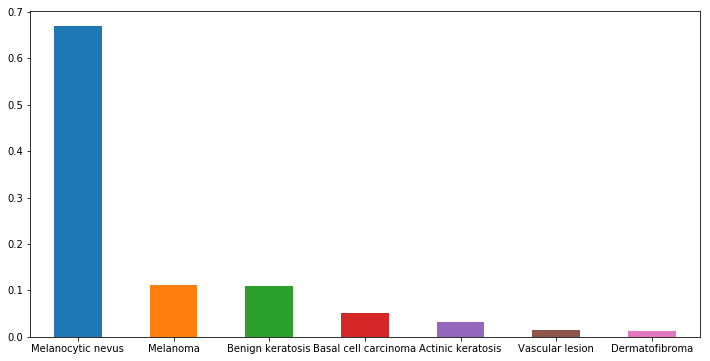

In [16]:
labels.value_counts(normalize = True).plot(kind = 'bar', figsize = (12,6), rot = 0)
plt.savefig('Task3-DiseaseTypeFrequency.png')

In [22]:
X_flip = X_orig[:,:,n_W0-1::-1,:]

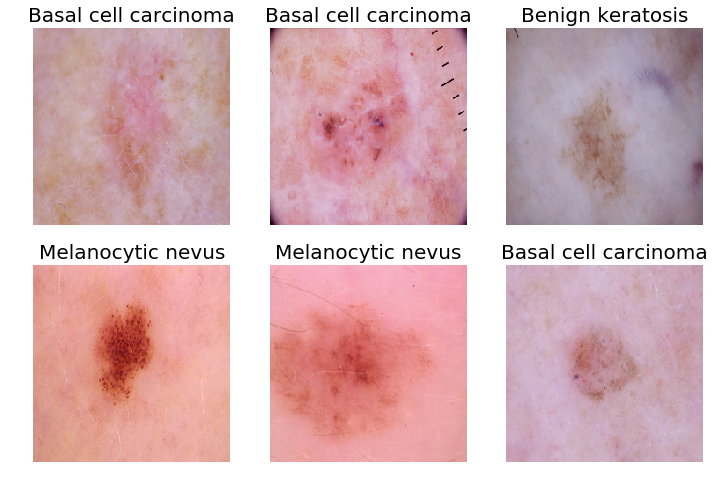

In [23]:
num_rows = 2
num_cols = 3

fig, ax = plt.subplots(nrows = num_rows, ncols = num_cols)
fig.set_size_inches(12,8)
#fig.axis('off')
for i, j in enumerate(idx):
    # Find the right place to put the images, a is the row in the figure and b is the column
    
    a = i//num_cols
    b = i%num_cols
    
    # Draw image and set x label as the actual label of the image i.e. the value of the digit in the image
    ax[a][b].axis('off')
    ax[a][b].imshow(X_flip[j])
    ax[a][b].set_title(labels[j], fontsize = 20)

fig.savefig('Task3-Imgs-Flip.png')
fig.show()